# Importación de librerias

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import numpy as np
import optuna
from scripts import *

In [35]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
sns.set_context("notebook", rc={"figure.figsize": (12, 6)})

In [36]:
full_dataset_path = './datasets/full_dataset.parquet'

# Cargar el modelo

In [37]:
df_full = pd.read_parquet(full_dataset_path)

In [38]:
model = lgb.Booster(model_file='modelo_lgb.txt')
print("Modelo cargado exitosamente")

Modelo cargado exitosamente


In [39]:
future_periods = ['202001', '202002']
test_periods = ['201912']

In [40]:
df_train_test = df_full[~df_full['periodo'].isin(future_periods)]

In [41]:
df_train = df_train_test[~df_train_test['periodo'].isin(test_periods)]
df_test = df_train_test[df_train_test['periodo'].isin(test_periods)]
df_future = df_full[df_full['periodo'].isin(future_periods)]

# Hacer predicción para 202001

In [42]:
features = [col for col in df_train.columns if col not in ['tn', 'periodo', 'periodo_dt', 'year', 'customer_id', 'product_id', 'customer_id_limited', 'product_id_limited']]
categorical_cols = ['cat1', 'cat2', 'cat3', 'brand', 'sku_size', 'customer_id_limited_encoded', 'product_id_limited_encoded']

In [43]:
X_train = df_train[features]
y_train = df_train['tn']
X_test = df_test[features]
y_test = df_test['tn']

In [44]:
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_train = pd.DataFrame(y_pred_train, columns=['predicciones'], index=X_train.index)
y_pred_test = pd.DataFrame(y_pred_test, columns=['predicciones'], index=X_test.index)

df_train.loc[df_train.index, 'predicciones'] = y_pred_train['predicciones']
df_test.loc[df_test.index, 'predicciones'] = y_pred_test['predicciones']

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\3017154009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[df_train.index, 'predicciones'] = y_pred_train['predicciones']
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\3017154009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[df_test.index, 'predicciones'] = y_pred_test['predicciones']


# Predecir 2020-01

In [45]:
X_pred = df_future[features]
X_pred

,cat1,cat2,cat3,brand,sku_size,month,days_in_month,quarter,month_sin,month_cos,...,tn_is_max_29,tn_is_max_30,tn_is_max_31,tn_is_max_32,tn_is_max_33,tn_is_max_34,tn_is_max_35,tn_is_max_36,customer_id_limited_encoded,product_id_limited_encoded
15601222,PC,CABELLO,SHAMPOO,NIVEA,180,1,31,1,0.500000,0.866025,...,False,False,False,False,False,False,False,False,0,0
15601223,PC,CABELLO,SHAMPOO,NIVEA,180,1,31,1,0.500000,0.866025,...,False,False,False,False,False,False,False,False,0,0
15601224,PC,CABELLO,SHAMPOO,NIVEA,180,1,31,1,0.500000,0.866025,...,False,False,False,False,False,False,False,False,0,0
15601225,PC,CABELLO,SHAMPOO,NIVEA,180,1,31,1,0.500000,0.866025,...,False,False,False,False,False,False,False,False,43,0
15601226,PC,CABELLO,SHAMPOO,NIVEA,180,1,31,1,0.500000,0.866025,...,False,False,False,False,False,False,False,False,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16404145,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2,29,1,0.866025,0.500000,...,False,False,False,False,False,False,False,False,172,0
16404146,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2,29,1,0.866025,0.500000,...,False,False,False,False,False,False,False,False,109,0
16404147,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2,29,1,0.866025,0.500000,...,False,False,False,False,False,False,False,False,82,0
16404148,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2,29,1,0.866025,0.500000,...,False,False,False,False,False,False,False,False,26,0


In [46]:
predicciones = model.predict(X_pred, categorical_feature=categorical_cols)
predicciones

array([-0.09620599, -0.10943702, -0.11243437, ..., -0.122194  ,
       -0.10654711, -0.05454829])

In [47]:
predicciones = pd.DataFrame(predicciones, columns=['predicciones'], index=X_pred.index)
predicciones

,predicciones
15601222,-0.096206
15601223,-0.109437
15601224,-0.112434
15601225,-0.072713
15601226,0.061450
...,...
16404145,-0.120608
16404146,-0.127687
16404147,-0.122194
16404148,-0.106547


In [48]:
df_future.loc[predicciones.index, 'tn'] = predicciones['predicciones']
df_future.loc[predicciones.index, 'predicciones'] = predicciones['predicciones']
df_future

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1194452591.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.09620599 -0.10943702 -0.11243437 ... -0.122194   -0.10654711
 -0.05454829]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_future.loc[predicciones.index, 'tn'] = predicciones['predicciones']
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1194452591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future.loc[predicciones.index, 'predicciones'] = predicciones['predicciones']


,customer_id,product_id,periodo,tn,cat1,cat2,cat3,brand,sku_size,periodo_dt,...,tn_is_max_32,tn_is_max_33,tn_is_max_34,tn_is_max_35,tn_is_max_36,customer_id_limited,product_id_limited,customer_id_limited_encoded,product_id_limited_encoded,predicciones
15601222,10215,20334,202001,-0.096206,PC,CABELLO,SHAMPOO,NIVEA,180,2020-01-01,...,False,False,False,False,False,-1,-1,0,0,-0.096206
15601223,10298,20334,202001,-0.109437,PC,CABELLO,SHAMPOO,NIVEA,180,2020-01-01,...,False,False,False,False,False,-1,-1,0,0,-0.109437
15601224,10163,20334,202001,-0.112434,PC,CABELLO,SHAMPOO,NIVEA,180,2020-01-01,...,False,False,False,False,False,-1,-1,0,0,-0.112434
15601225,10064,20334,202001,-0.072713,PC,CABELLO,SHAMPOO,NIVEA,180,2020-01-01,...,False,False,False,False,False,10064,-1,43,0,-0.072713
15601226,10154,20334,202001,0.061450,PC,CABELLO,SHAMPOO,NIVEA,180,2020-01-01,...,False,False,False,False,False,10154,-1,98,0,0.061450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16404145,10303,20684,202002,-0.120608,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10303,-1,172,0,-0.120608
16404146,10170,20684,202002,-0.127687,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10170,-1,109,0,-0.127687
16404147,10126,20684,202002,-0.122194,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10126,-1,82,0,-0.122194
16404148,10038,20684,202002,-0.106547,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10038,-1,26,0,-0.106547


In [49]:
df = pd.concat([df_train, df_test, df_future])
df

,customer_id,product_id,periodo,tn,cat1,cat2,cat3,brand,sku_size,periodo_dt,...,tn_is_max_32,tn_is_max_33,tn_is_max_34,tn_is_max_35,tn_is_max_36,customer_id_limited,product_id_limited,customer_id_limited_encoded,product_id_limited_encoded,predicciones
0,10234,20524,201701,0.360639,HC,VAJILLA,Cristalino,Importado,500,2017-01-01,...,False,False,False,False,False,10234,20524,139,164,-0.084946
1,10356,20360,201701,-0.153475,FOODS,SOPAS Y CALDOS,Salsas Wet,MAGGI,350,2017-01-01,...,False,False,False,False,False,10356,-1,199,0,-0.098119
2,10025,20539,201701,0.181598,PC,DEOS,Aero,COLBERT,90,2017-01-01,...,False,False,False,False,False,10025,-1,19,0,0.169670
3,10099,20539,201701,-0.174626,PC,DEOS,Aero,COLBERT,90,2017-01-01,...,False,False,False,False,False,10099,-1,66,0,-0.055095
4,10319,20111,201701,-0.230727,PC,DEOS,Talco,DEOS1,60,2017-01-01,...,False,False,False,False,False,-1,-1,0,0,-0.069128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16404145,10303,20684,202002,-0.120608,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10303,-1,172,0,-0.120608
16404146,10170,20684,202002,-0.127687,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10170,-1,109,0,-0.127687
16404147,10126,20684,202002,-0.122194,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10126,-1,82,0,-0.122194
16404148,10038,20684,202002,-0.106547,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10038,-1,26,0,-0.106547


In [50]:
df_train['periodo'] = df_train['periodo'].astype(str)
df_test['periodo'] = df_test['periodo'].astype(str)
df_future['periodo'] = df_future['periodo'].astype(str)

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1653149169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['periodo'] = df_train['periodo'].astype(str)
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1653149169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['periodo'] = df_test['periodo'].astype(str)
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1653149169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [51]:
df = pd.concat([df_train, df_test, df_future])
df

,customer_id,product_id,periodo,tn,cat1,cat2,cat3,brand,sku_size,periodo_dt,...,tn_is_max_32,tn_is_max_33,tn_is_max_34,tn_is_max_35,tn_is_max_36,customer_id_limited,product_id_limited,customer_id_limited_encoded,product_id_limited_encoded,predicciones
0,10234,20524,201701,0.360639,HC,VAJILLA,Cristalino,Importado,500,2017-01-01,...,False,False,False,False,False,10234,20524,139,164,-0.084946
1,10356,20360,201701,-0.153475,FOODS,SOPAS Y CALDOS,Salsas Wet,MAGGI,350,2017-01-01,...,False,False,False,False,False,10356,-1,199,0,-0.098119
2,10025,20539,201701,0.181598,PC,DEOS,Aero,COLBERT,90,2017-01-01,...,False,False,False,False,False,10025,-1,19,0,0.169670
3,10099,20539,201701,-0.174626,PC,DEOS,Aero,COLBERT,90,2017-01-01,...,False,False,False,False,False,10099,-1,66,0,-0.055095
4,10319,20111,201701,-0.230727,PC,DEOS,Talco,DEOS1,60,2017-01-01,...,False,False,False,False,False,-1,-1,0,0,-0.069128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16404145,10303,20684,202002,-0.120608,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10303,-1,172,0,-0.120608
16404146,10170,20684,202002,-0.127687,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10170,-1,109,0,-0.127687
16404147,10126,20684,202002,-0.122194,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10126,-1,82,0,-0.122194
16404148,10038,20684,202002,-0.106547,FOODS,ADEREZOS,Mostaza,MOSTAZA1,220,2020-02-01,...,False,False,False,False,False,10038,-1,26,0,-0.106547


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


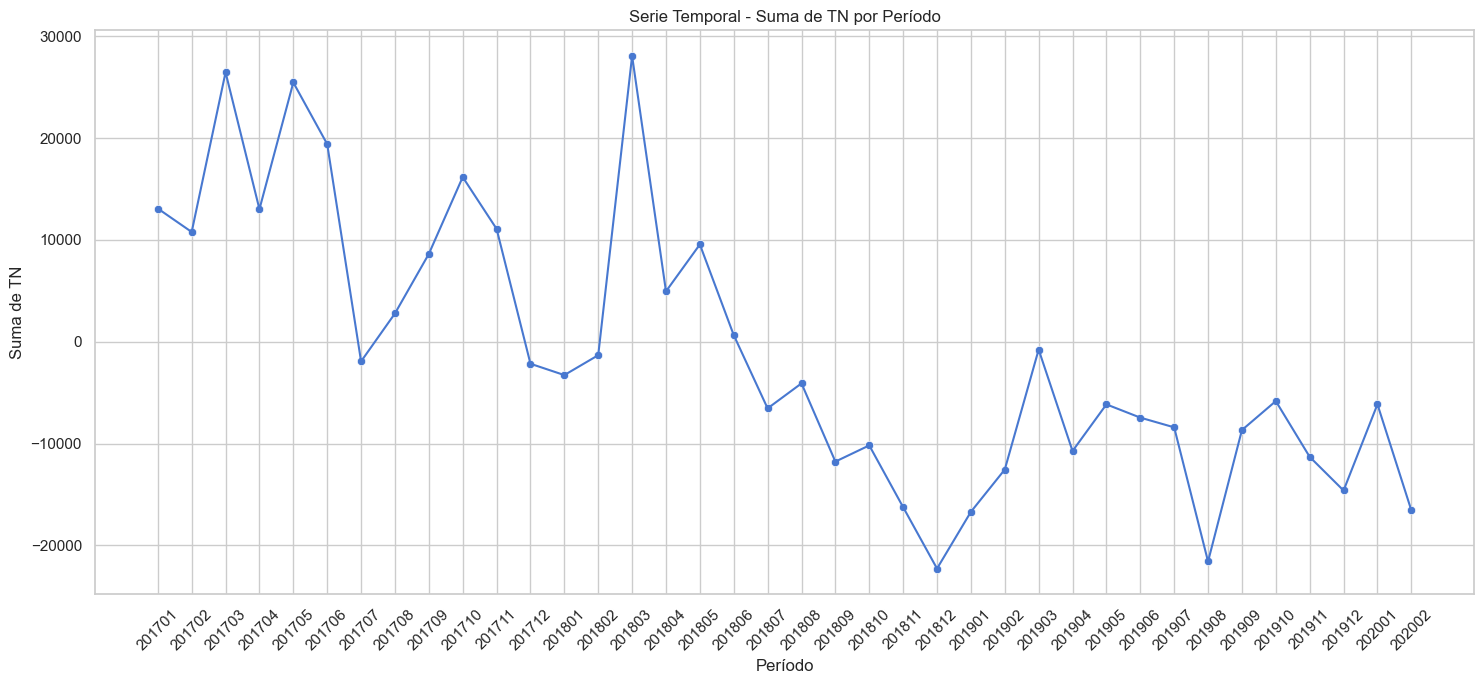

In [52]:
# Agrupar por periodo y sumar tn
df_sum = df.groupby('periodo')['tn'].sum().reset_index()

# Crear gráfico de serie temporal
plt.figure(figsize=(15,7))
sns.lineplot(data=df_sum, x='periodo', y='tn')
sns.scatterplot(data=df_sum, x='periodo', y='tn')
plt.xticks(rotation=45)
plt.title('Serie Temporal - Suma de TN por Período')
plt.xlabel('Período')
plt.ylabel('Suma de TN')
plt.grid(True)
plt.tight_layout()

In [53]:
df_train['periodo'] = df_train['periodo'].astype('category')
df_test['periodo'] = df_test['periodo'].astype('category')
df_future['periodo'] = df_future['periodo'].astype('category')

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\2184152276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['periodo'] = df_train['periodo'].astype('category')
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\2184152276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['periodo'] = df_test['periodo'].astype('category')
C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\2184152276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

# Obtener predicción de productos

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import numpy as np
import optuna
from scripts import *

In [55]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
sns.set_context("notebook", rc={"figure.figsize": (12, 6)})

In [56]:
dataset_train_path = './datasets/train.parquet'
dataset_test_path = './datasets/test.parquet'
dataset_future_path = './datasets/future.parquet'

In [57]:
productos_a_predecir_path = './datasets/product_id_apredecir201912.txt'

In [58]:
df_productos_a_predecir = pd.read_csv(productos_a_predecir_path, dtype={'product_id': 'str'})
df_productos_a_predecir

,product_id
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
775,21263
776,21265
777,21266
778,21267


In [59]:
df = df[['customer_id', 'product_id', 'periodo', 'tn', 'predicciones']]

In [60]:
# Reescalar las predicciones a los valores originales
import pickle

tn_scaler_path = './scalers/scalers.pkl'

scalers = {}
with open(tn_scaler_path, 'rb') as f:
    scalers = pickle.load(f)

scaled_tn = []
for product_id, group in df.groupby('product_id'):
    group = group.copy()
    if product_id in scalers:
        scaler = scalers[product_id]
        group['tn_unscaled'] = scaler.inverse_transform(group[['tn']])
        group['predicciones_unscaled'] = scaler.inverse_transform(group[['predicciones']])
    else:
        print(f"Warning: No scaler found for product {product_id}")
        group['tn_unscaled'] = 0
        group['predicciones_unscaled'] = 0
    scaled_tn.append(group)

df = pd.concat(scaled_tn, axis=0)

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\1524288870.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for product_id, group in df.groupby('product_id'):


In [61]:
df['periodo'] = df['periodo'].astype(str)

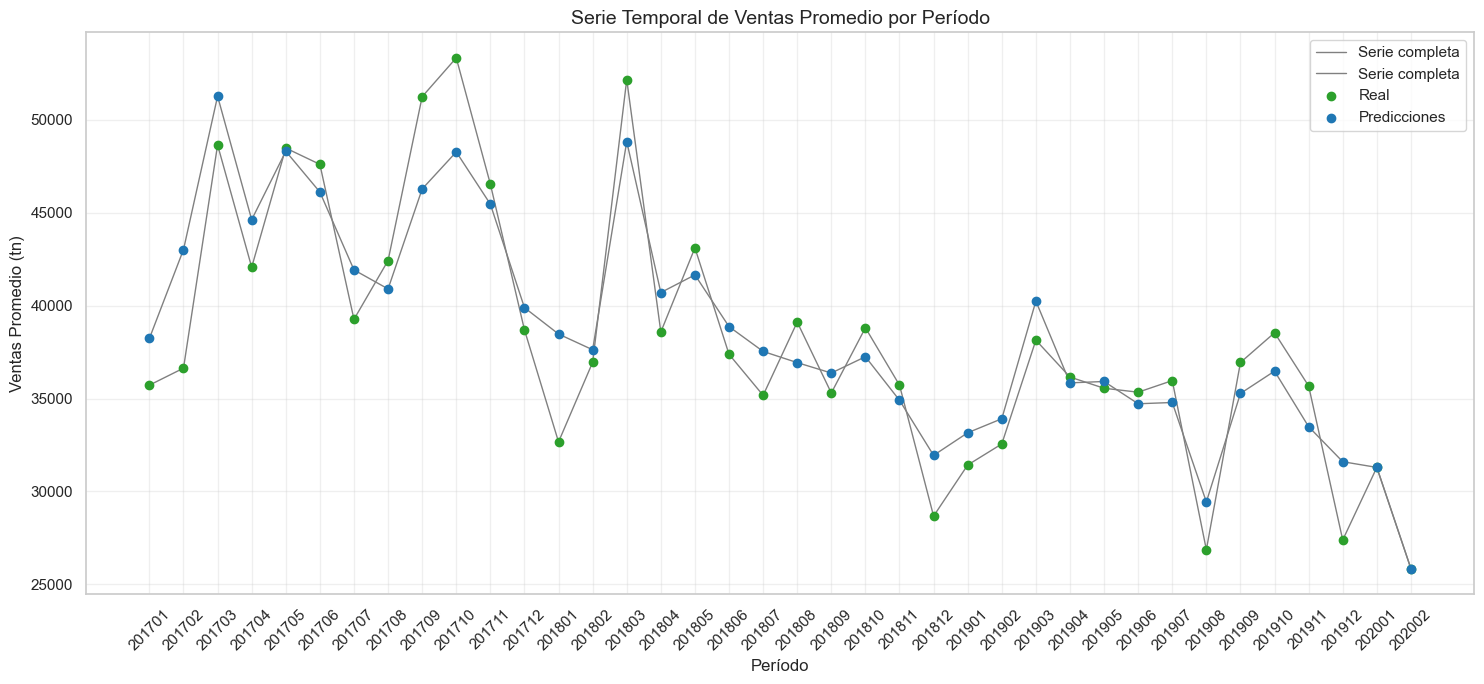

In [62]:
df_aux = df.groupby('periodo')[['tn_unscaled', 'predicciones_unscaled']].sum()

plt.figure(figsize=(15, 7))

plt.plot(df_aux.index, df_aux['tn_unscaled'], color='gray', linewidth=1, label='Serie completa')
plt.plot(df_aux.index, df_aux['predicciones_unscaled'], color='gray', linewidth=1, label='Serie completa')

plt.scatter(df_aux.index, df_aux['tn_unscaled'], color='tab:green', label='Real', zorder=3)
plt.scatter(df_aux.index, df_aux['predicciones_unscaled'], color='tab:blue', label='Predicciones', zorder=3)

plt.title('Serie Temporal de Ventas Promedio por Período', fontsize=14)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Ventas Promedio (tn)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
df_output = df[(df['product_id'].isin(df_productos_a_predecir['product_id'])) & (df['periodo'].isin(['202001', '202002']))]
df_output['product_id'] = df_output['product_id'].astype(str)
df_output

C:\Users\dylan\AppData\Local\Temp\ipykernel_24732\3824233124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['product_id'] = df_output['product_id'].astype(str)


,customer_id,product_id,periodo,tn,predicciones,tn_unscaled,predicciones_unscaled
15990241,10148,20001,202001,-0.096369,-0.096369,0.971404,0.971404
15990242,10027,20001,202001,0.722930,0.722930,16.645549,16.645549
15990243,10135,20001,202001,-0.142519,-0.142519,0.088502,0.088502
15990244,10001,20001,202001,11.068259,11.068259,214.563703,214.563703
15990245,10055,20001,202001,-0.134969,-0.134969,0.232949,0.232949
...,...,...,...,...,...,...,...
16192433,10433,21276,202002,-0.073705,-0.073705,-0.000030,-0.000030
16192434,10249,21276,202002,-0.015638,-0.015638,0.000073,0.000073
16192435,10518,21276,202002,-0.071616,-0.071616,-0.000027,-0.000027
16192436,10442,21276,202002,-0.070209,-0.070209,-0.000024,-0.000024


In [64]:
df_output.loc[df_output['predicciones_unscaled'] < 0, 'predicciones_unscaled'] = 0
df_output

,customer_id,product_id,periodo,tn,predicciones,tn_unscaled,predicciones_unscaled
15990241,10148,20001,202001,-0.096369,-0.096369,0.971404,0.971404
15990242,10027,20001,202001,0.722930,0.722930,16.645549,16.645549
15990243,10135,20001,202001,-0.142519,-0.142519,0.088502,0.088502
15990244,10001,20001,202001,11.068259,11.068259,214.563703,214.563703
15990245,10055,20001,202001,-0.134969,-0.134969,0.232949,0.232949
...,...,...,...,...,...,...,...
16192433,10433,21276,202002,-0.073705,-0.073705,-0.000030,0.000000
16192434,10249,21276,202002,-0.015638,-0.015638,0.000073,0.000073
16192435,10518,21276,202002,-0.071616,-0.071616,-0.000027,0.000000
16192436,10442,21276,202002,-0.070209,-0.070209,-0.000024,0.000000


In [65]:
df_output = df_output.drop('predicciones', axis=1)
df_output = df_output.rename(columns={'predicciones_unscaled': 'predicciones'})
df_output = df_output.groupby(['product_id'])[['predicciones']].sum().reset_index()
df_output

,product_id,predicciones
0,20001,2660.406091
1,20002,2399.569258
2,20003,1388.234157
3,20004,1203.095250
4,20005,1110.212562
...,...,...
775,21263,0.088360
776,21265,0.121301
777,21266,0.126720
778,21267,0.134497


In [66]:
df_output.to_csv('output.csv', index=False)